## Getting started with SMRT

1. Get up to date: git status / git pull
1. Install requirements
1. (Run tests)
2. Jupyter notebooks
3. SMRT imports
4. Build simple sensor: use AMSR-E single channel
5. Build 1-layer snowpack (SHS) as simple as possible
6. Build model (DMRT-QCA, DORT)
7. Run model and output results
8. Switch DMRT-QCA with IBA and run
9. Turn ipynb into script and run
10. Website help.

## Got python?
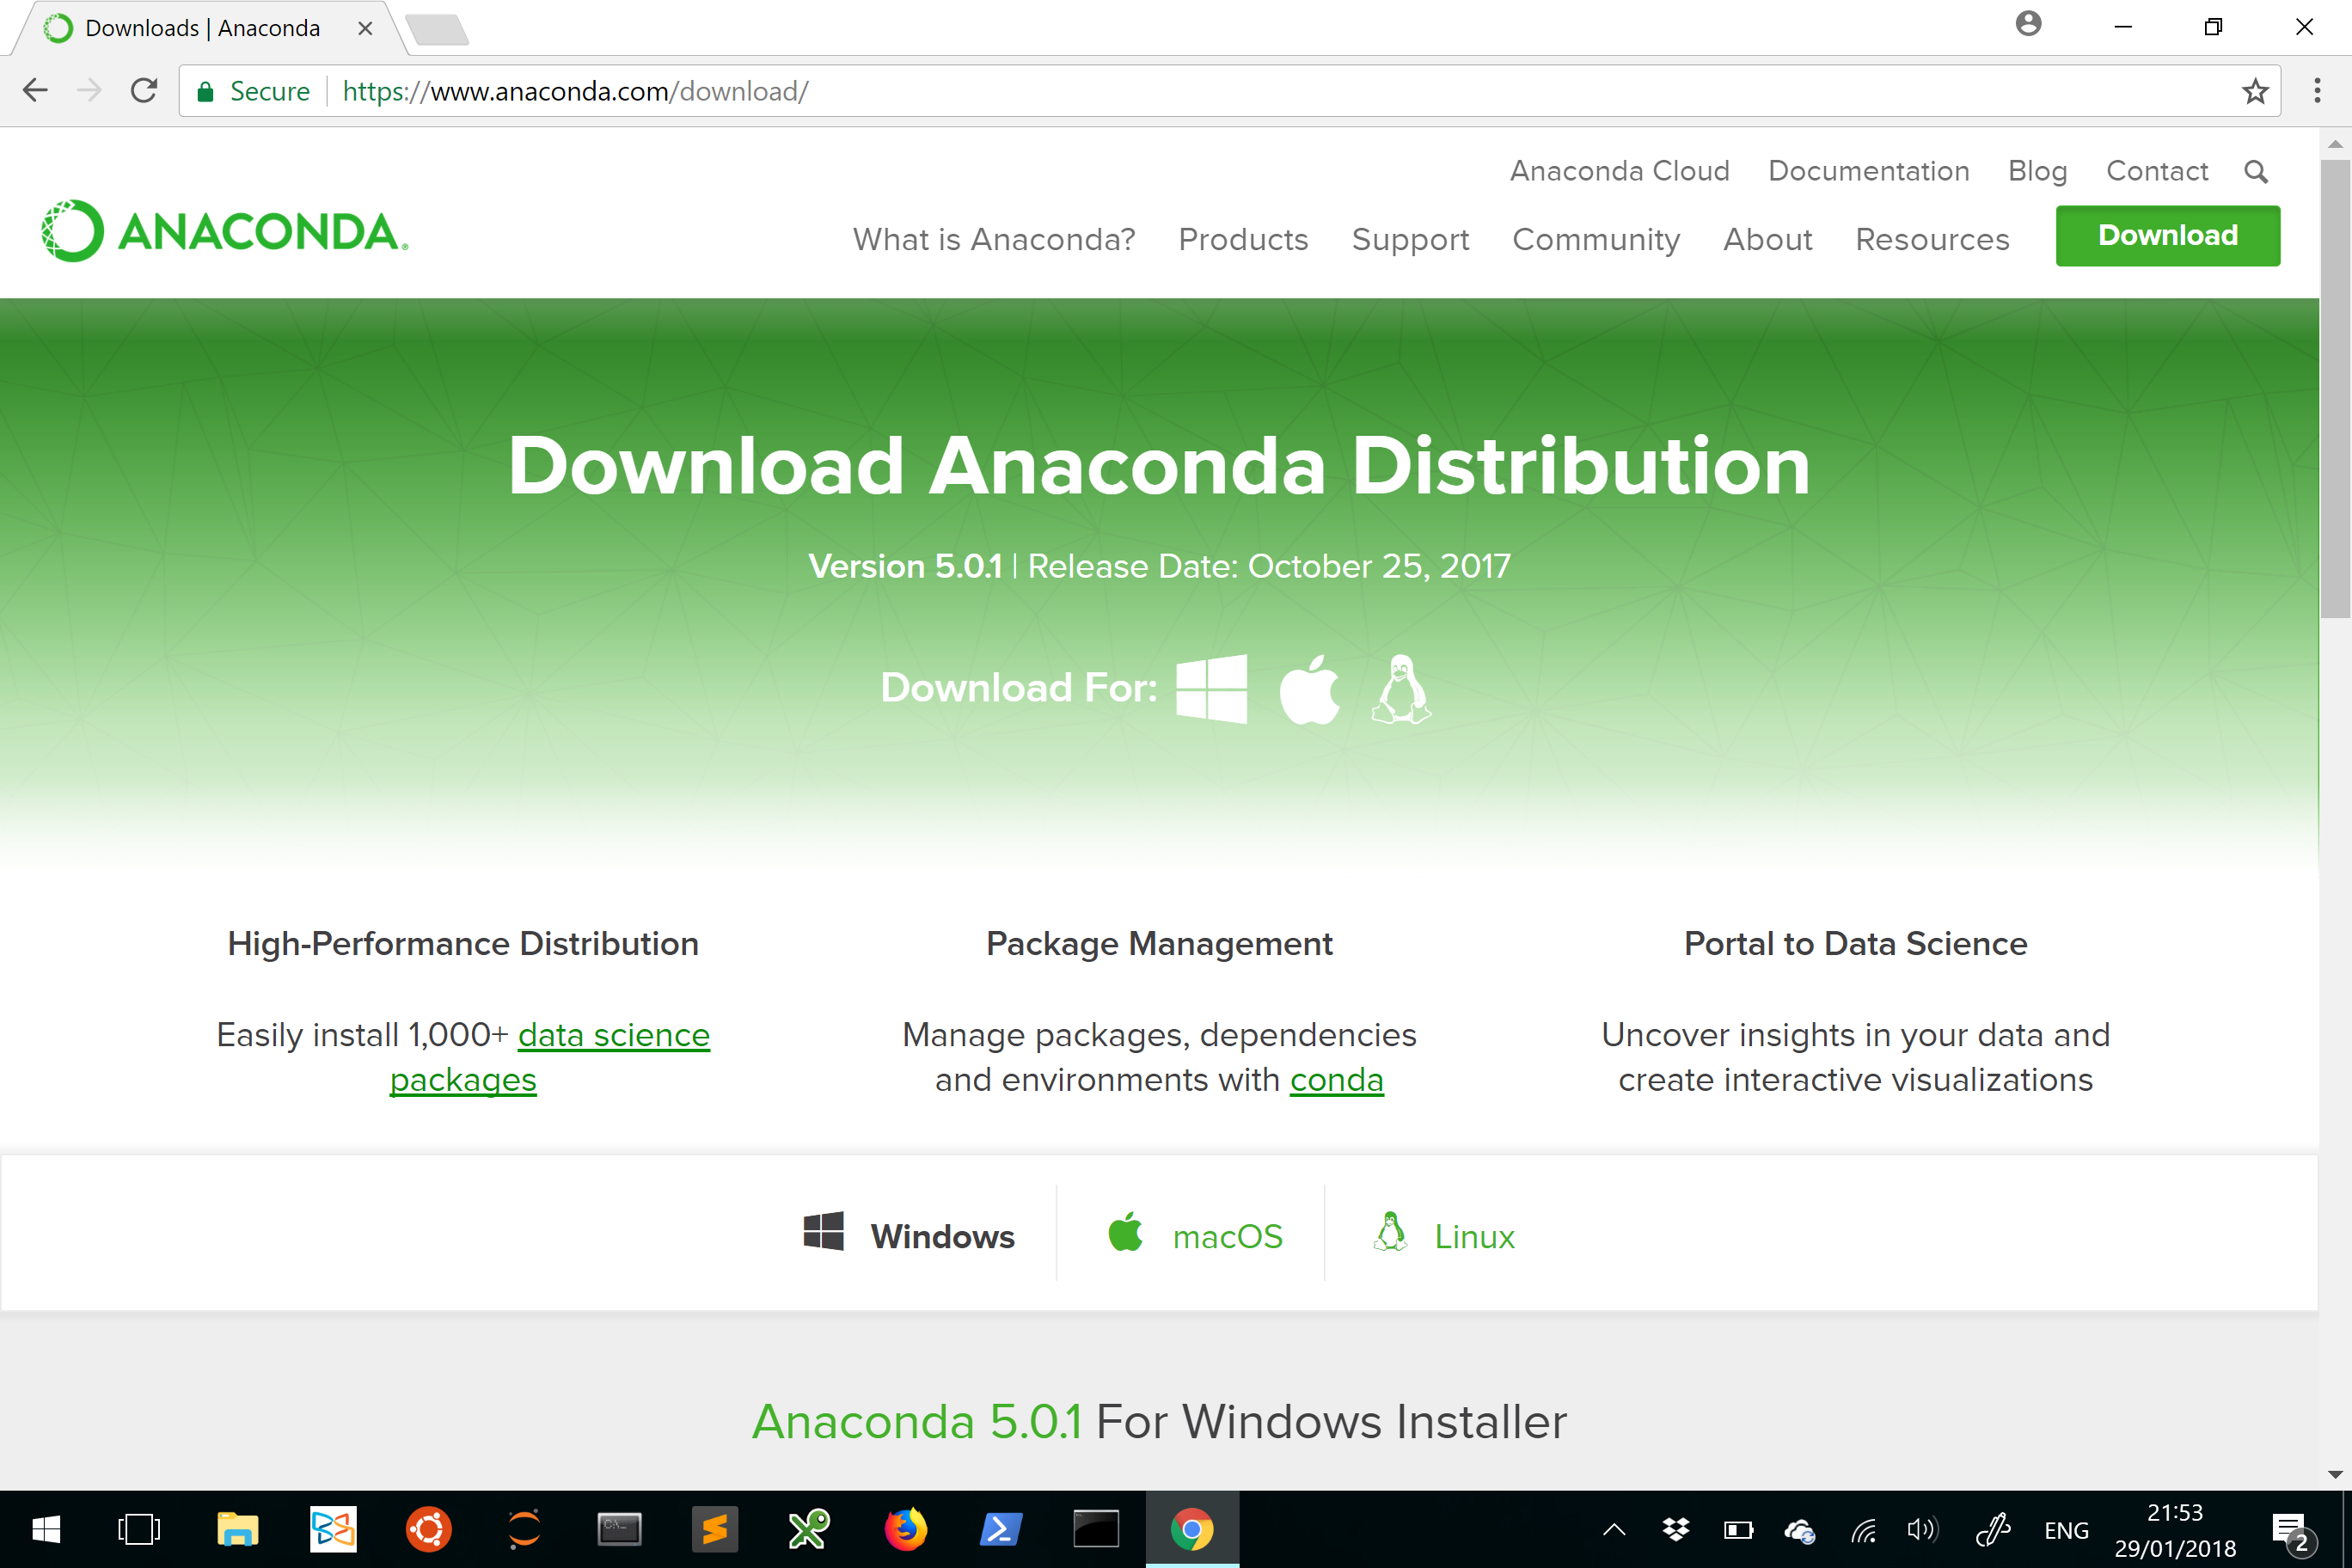

## Not got SMRT?


In anaconda / terminal:

```shell
git clone https://github.com/smrt-model/smrt
```

### Already have SMRT? Check it's the latest version

```shell
git status
```


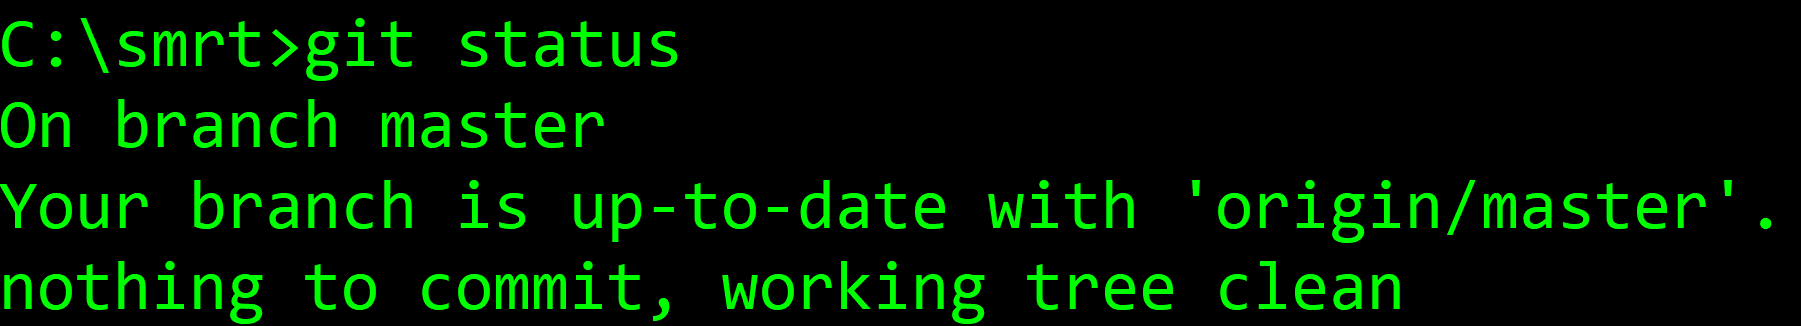


If it doesn't say this, then
```shell
git pull
```

## Install required packages....

Anaconda:

```shell

conda install --yes --file requirements.txt

```

Bash:

```shell

pip install --user -r requirements.txt

```

## Setting the pythonpath to SMRT

Anaconda Ghislain!!!?

Bash (edit your ~/.bashrc)

```shell
export PYTHONPATH="/mnt/c/Users/melod/CODEREPO/smrt"
```
Windows: 
1. Go to settings, search for 'edit the system environment variables'
2. Click on 'Environment Variables'
3. Create new system variable
4. Name it PYTHONPATH
5. Enter or browse to the path to your SMRT directory





## Python basics

Start up a jupyter notebook (conda install jupyter / pip install jupyter)

```shell

jupyter notebook

```

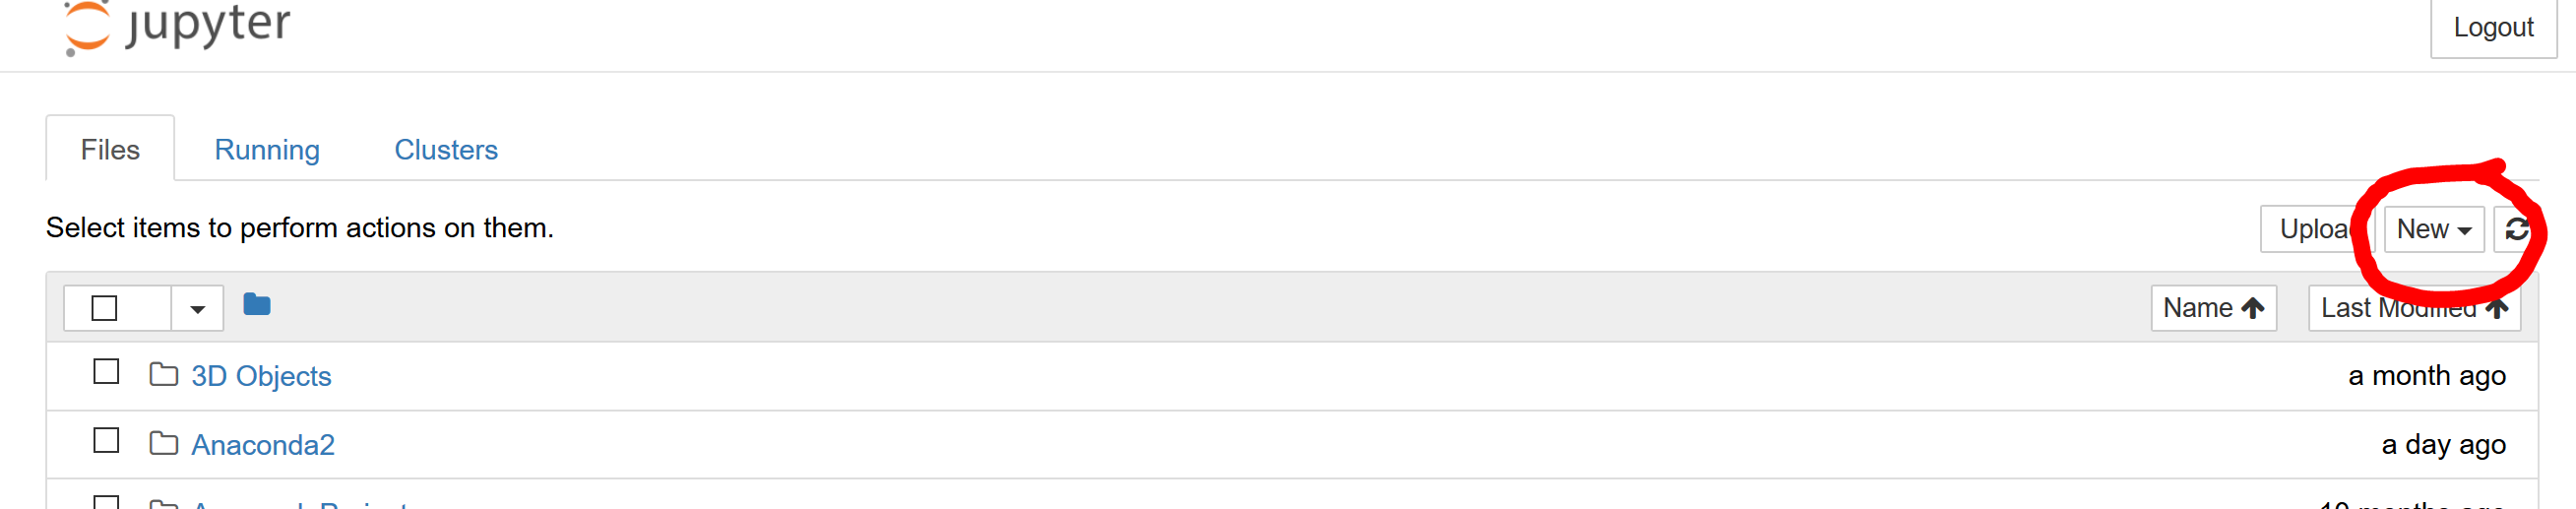

next slide is hello world demo. Remember brackets for python 3

### Python basics: list

Lists are a useful way of grouping data.

In [ ]:
# Make a list of numbers
test = [1,2,3,4]
print(test)

In [ ]:
# Doesn't always do what you think....
print(test*2)

In [ ]:
# Make a list of strings
mylist = ['a','b','cc','d']

### Lists are numbered from 0 !!!!

In [ ]:
print(mylist[0])

In [ ]:
print(test[3]*2)

#### Python basics: Plotting

In [ ]:
# First we need to import the matplotlib plotting package
import matplotlib.pyplot as plt
%matplotlib inline

# Make a simple graph
x = [1,2,4]
y = [10,40,100]
plt.plot(x,y); # <- This semicolon isn't needed

In [ ]:
# Make a simple graph
x = [1,2,4]
y = [10,40,100]
plt.plot(x,y,'bo')

## Let's import the modules we need to run SMRT
We'll need to make the snowpack, set up the model configuration and some form of sensor. 

For now, we'll use a module that replicates the AMSR-E radiometers (6.925, 10.65, 18.7, 23.8, 36.5, 89.9 GHz, 55 degree incidence angle).

In [ ]:
from smrt import make_snowpack, make_model
from smrt.sensor_list import amsre

In [ ]:
# import sys
# sys.path.append('C:/your_path_to_smrt_directory')

## Time to make a snowpack!
A single layer, deep snowpack....

We need to know the layer thickness, temperature, sticky hard sphere radius, stickiness and density

### All units are SI

In [ ]:
# Define parameters
thickness = [10]
temperature = [265]
rad = [1e-4]
rho = [280]
stickiness = [0.2]

# Make snowpack
snowpack = make_snowpack(thickness=thickness, 
                         microstructure_model='sticky_hard_spheres',
                         temperature=temperature, radius=rad, density=rho,
                         stickiness=stickiness)


In [ ]:
print(snowpack)

#### See inside an object.....

In [ ]:
dir(snowpack)

In [ ]:
# A snowpack is a list of layers objects....
dir(snowpack.layers[0])

In [ ]:
print(snowpack.layers[0].temperature)

## Decide type of model you want 
For now we will use DMRT-QCA electromagnetic model with the discrete ordinates solver (DORT)

In [ ]:
# m = make_model('dmrt_qca_shortrange','dort')
m = make_model('iba','dort')

## One last thing to do before we run the model: specify a sensor

This could be active or passive (see sensor practical) but for now we use the prebuilt AMSR-E that we have already imported, and we'll use just the 37V channel

In [ ]:
radiometer = amsre('37V')

In [ ]:
result = m.run(radiometer, snowpack)

In [ ]:
print(result.TbV(), result.TbH())

In [ ]:
# Use all amsre channels
rads = amsre()
res = m.run(rads, snowpack)
print(res.TbV())